<a href="https://colab.research.google.com/github/ShuqairABD/Haar-Face-recognition-dlib/blob/main/Haar_%2B_Face_recognition_%2B_dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=499d3fe750e9795dbbd6ed3546a6dc34d7776ec8e5db0015ba4b4a4d5cb3548c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
# Импортируем необходимые библиотеки
import cv2  # Библиотека OpenCV для обработки изображений
import dlib  # Библиотека dlib для обнаружения лиц
import face_recognition  # Библиотека face_recognition для распознавания лиц
from google.colab import files  # Импорт функции для загрузки файлов в Google Colab
import os  # Библиотека для работы с операционной системой

In [ ]:
# Создаем каталог для загрузки фотографий
!mkdir photos

In [ ]:
# Получаем список путей к файлам изображений
photo_files = os.listdir('photos')

# Загружаем изображения
images = []
for file in photo_files:
    image = cv2.imread(os.path.join('photos', file))
    images.append(image)

In [ ]:
# Инициализируем детектор лиц
detector = dlib.get_frontal_face_detector()

# Загружаем Haar каскад для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Обнаруживаем лица на каждом изображении
detected_faces = []
for image in images:
    # Преобразуем изображение в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Обнаруживаем лица на оттенках серого изображения
    faces = detector(gray)
    detected_faces.append(faces)


In [ ]:
# Функция для распознавания лиц
def recognize_faces(image):
    # Кодируем лица на изображении
    face_encodings = face_recognition.face_encodings(image)
    return face_encodings

# Обнаруживаем и распознаем лица на каждом изображении
detected_faces = []
recognized_faces = []
for image in images:
    # Преобразуем изображение в оттенки серого для детектирования лиц
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица с использованием каскада Хаара
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    detected_faces.append(faces)

    # Распознаем лица
    face_encodings = recognize_faces(image)
    recognized_faces.append(face_encodings)


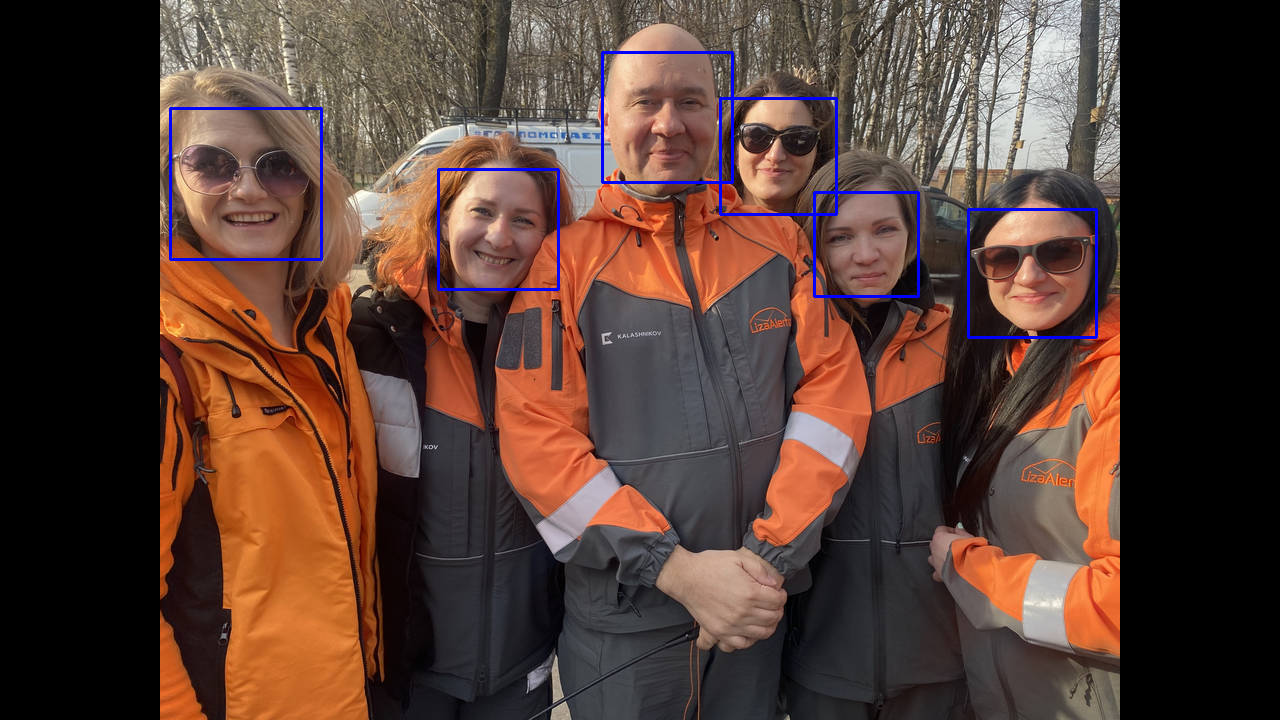

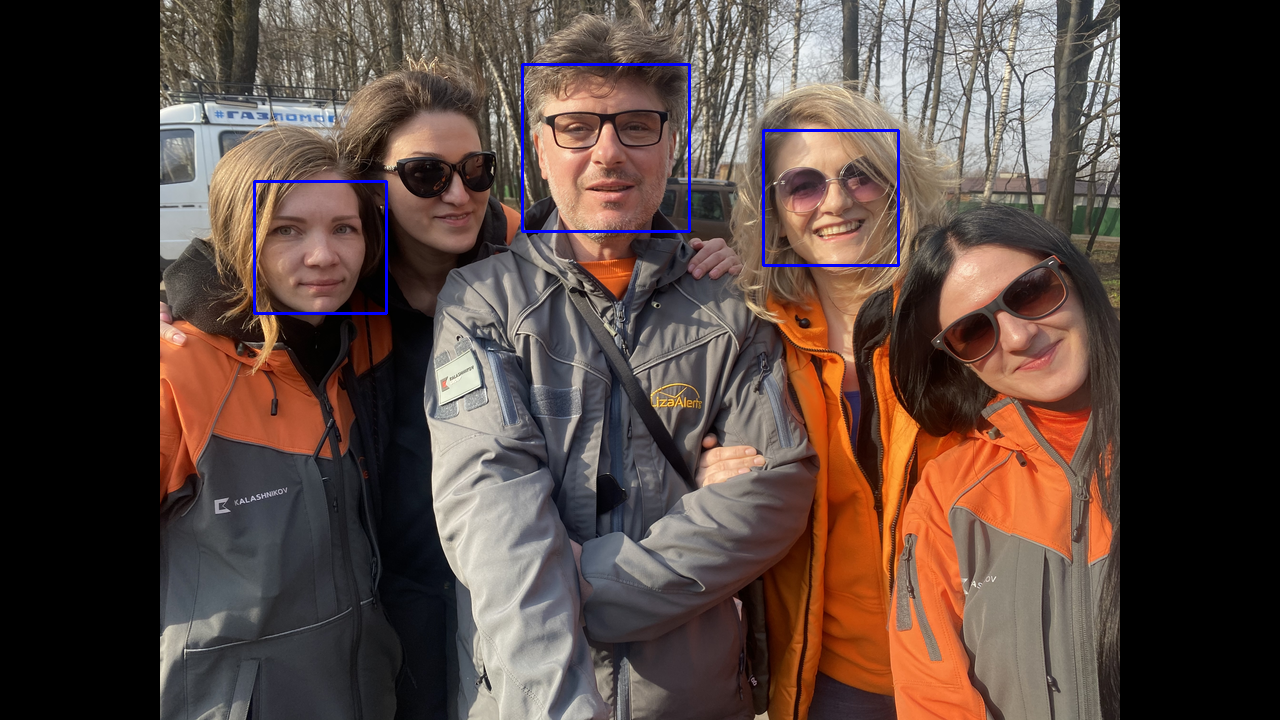

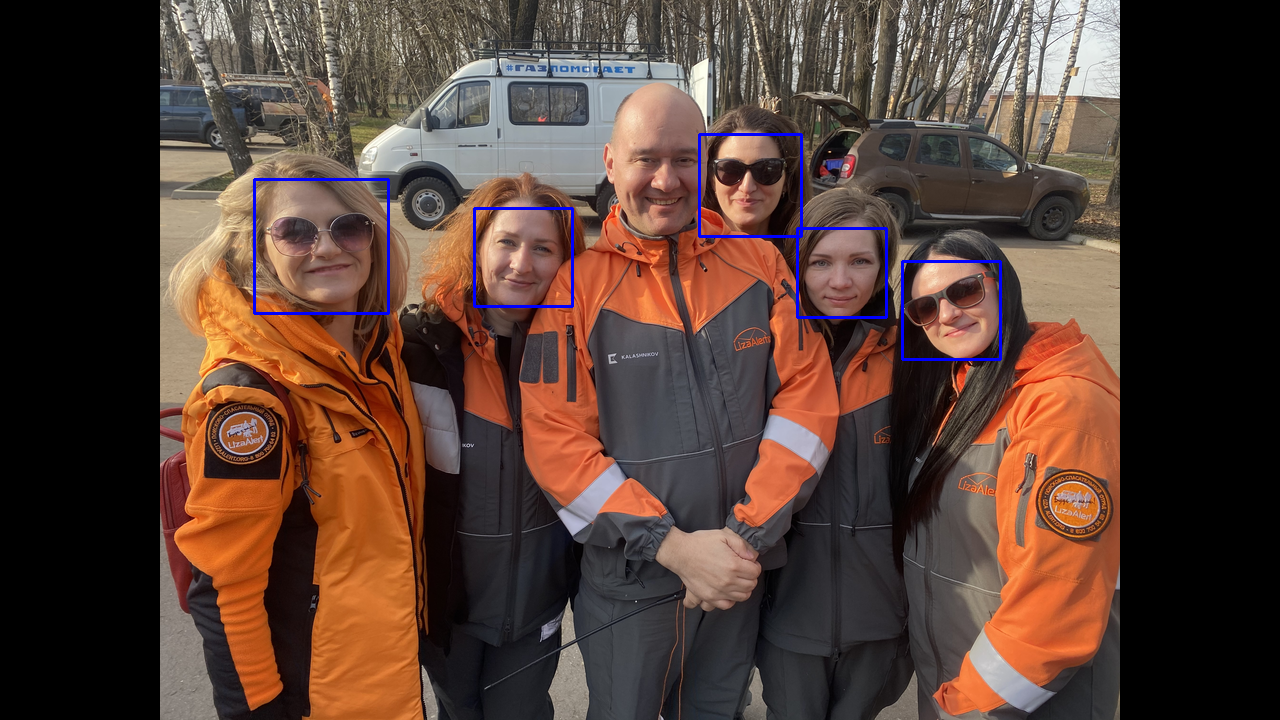

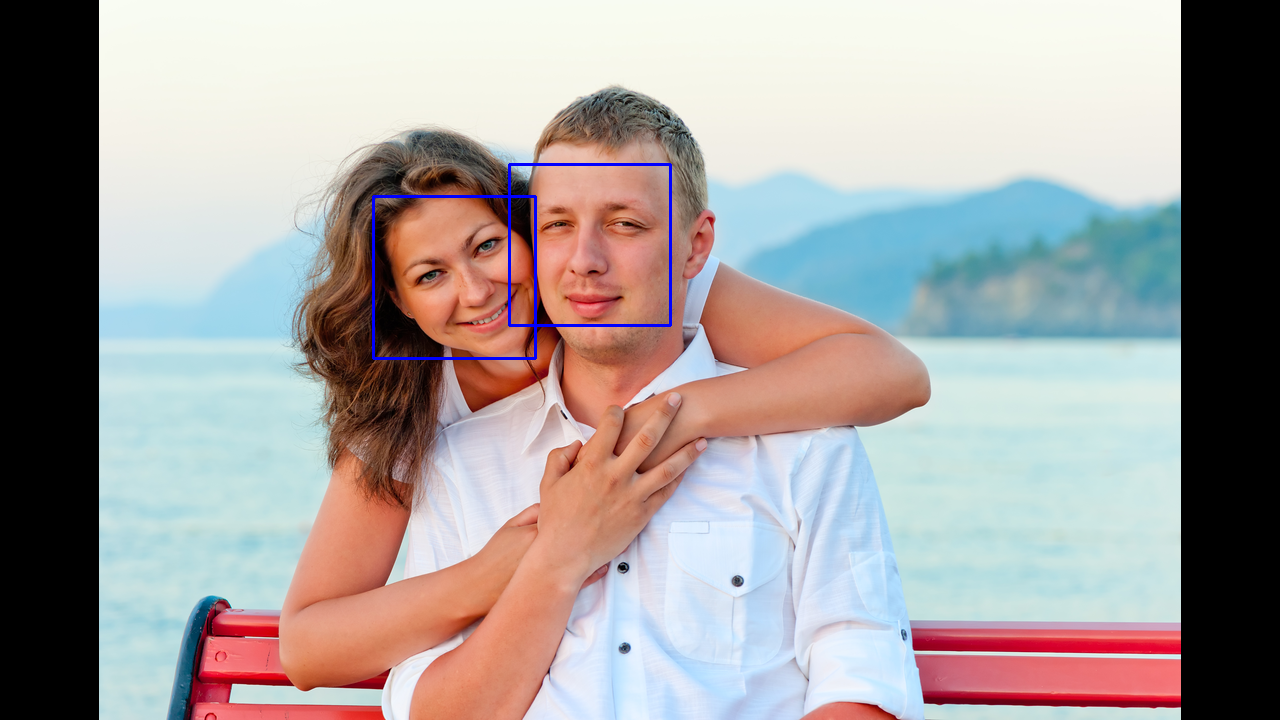

In [ ]:
from google.colab.patches import cv2_imshow

# Отображаем результаты
for i, image in enumerate(images):
    for (x, y, w, h) in detected_faces[i]:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Рисуем ограничительную рамку вокруг распознанных лиц (при наличии)
    for face_encoding in recognized_faces[i]:
        # Здесь можно реализовать отображение результатов распознавания
        pass
    # Отображаем изображение
    cv2_imshow(image)


##**Save the faces in folder**

**create zip folder**

In [ ]:
# Создаем каталог для сохранения обнаруженных лиц
!mkdir detected_faces

# Функция для сохранения обнаруженных лиц
def save_detected_faces(image_index, faces):
    for idx, (x, y, w, h) in enumerate(faces):
        face_image = images[image_index][y:y+h, x:x+w]
        cv2.imwrite(f'detected_faces/face_{image_index}_{idx}.jpg', face_image)

# Обнаруживаем и сохраняем лица
for i, image in enumerate(images):
    detected_faces = face_cascade.detectMultiScale(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), scaleFactor=1.3, minNeighbors=5)
    save_detected_faces(i, detected_faces)


**download zip folder**

In [ ]:
import shutil
import os

# Создаем zip-архив папки detected_faces
shutil.make_archive('detected_faces', 'zip', '.', 'detected_faces')

# Получаем путь к zip-файлу
zip_path = '/content/detected_faces.zip'